FileNotFoundError: [Errno 2] No such file or directory: '/Users/macbookair/Desktop/drawtools/plots/radar_chart.png'

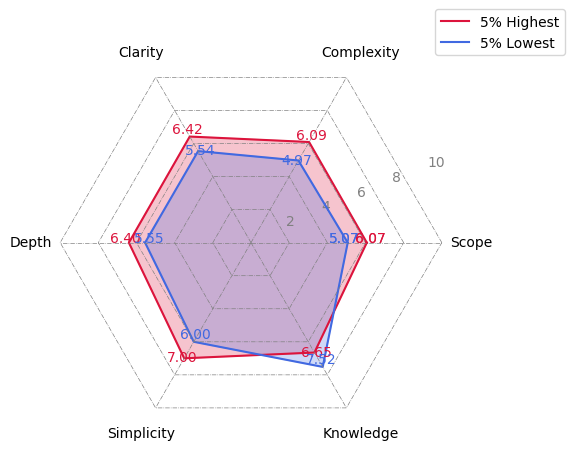

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_radar_chart(save_path, labels, scores_highest, scores_lowest):
    
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    scores_highest += scores_highest[:1]
    scores_lowest += scores_lowest[:1]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    ax.fill(angles, scores_highest, color='crimson', alpha=0.25)
    ax.plot(angles, scores_highest, color='crimson', label='5% Highest')

    ax.fill(angles, scores_lowest, color='royalblue', alpha=0.25)
    ax.plot(angles, scores_lowest, color='royalblue', label='5% Lowest')

    ax.set_yticks([2, 4, 6, 8, 10])
    ax.set_yticklabels(['2', '4', '6', '8', '10'], color="grey", size=10)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    for j in np.arange(0, 10+2, 2):
        ax.plot(angles, 7*[j], '-.', lw=0.5, color='grey')
    for j in range(6):
        ax.plot([angles[j], angles[j]], [0, 10], '-.', lw=0.5, color='grey')

    # 标注每个数据点的具体数值
    for i, (angle, score) in enumerate(zip(angles, scores_highest)):
        ax.text(angle, score + 0.2, f'{score:.2f}', horizontalalignment='center', size=10, color='crimson')
    
    for i, (angle, score) in enumerate(zip(angles, scores_lowest)):
        ax.text(angle, score - 0.2, f'{score:.2f}', horizontalalignment='center', size=10, color='royalblue')
    
    ax.spines['polar'].set_visible(False)
    # 隐藏圆形网格线
    ax.grid(False)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.tight_layout()
    plt.savefig(save_path)
    plt.close()

if __name__ == "__main__":

    labels = ['Scope', 'Complexity', 'Clarity', 'Depth', 'Simplicity', 'Knowledge']
    scores_highest = [6.07, 6.09, 6.42, 6.4, 7.0, 6.65]
    scores_lowest = [5.07, 4.97, 5.54, 5.55, 6.0, 7.52]

    plot_name = "radar_chart.png"
    # save_path_radar = f"/Users/macbookair/Desktop/drawtools/plots/{plot_name}"
    plot_radar_chart(save_path_radar, labels, scores_highest, scores_lowest)